In [241]:
# change this to add/remove libraries needed
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency, ttest_ind
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import warnings
warnings.simplefilter('ignore', FutureWarning)

## Project for DATA 30100- Autumn 2024 (due December 10)

This is not a group project. You may discuss the project with other students but you should code and write the report independently. You should acknowledge any help in writing. The score will be based on:
-  Clarity and soundness of the arguments and conclusions; 
-  Use of data to back up arguments and analysis quality;  
-  Insightfulness of the results;
-  Quality of the EDA, statistical analyses, and overall presentation. Make sure you use headings, captions for figures and tables etc. When you interpret a graph or data from a table, you should clearly specify which figure/table you refer to.

For this project, you are tasked to use the [National Crime Victimization Survey (NCVS)](https://www.icpsr.umich.edu/web/NACJD/studies/38090/summary). The NCVS gathers data about personal and household crimes since 1973. The primary goals of the survey are to collect information about the victims, to explore the consequences of crime, and to estimate the number and types of crimes that go unreported.

Information about the study and data can be found in the attached pdf.

The goal of this project is to gain insight into crime victimization using the tools you have learned so far in this class.

### The Data 

You can (but are not required to) use any additional data you can find to get insight into this issue, but you need to specify the provenance of that data in your report. Some potential options include:

- NCVS Series and Supplements, https://www.icpsr.umich.edu/web/NACJD/series/95
- Annual Survey of Jails 2020, https://www.icpsr.umich.edu/web/NACJD/studies/38408
- National Prisoner Statistics, https://www.icpsr.umich.edu/web/NACJD/studies/38249
- American Community Survey, https://www.census.gov/programs-surveys/acs/

There is a plethoral of data collected in the NCVS, and we have cleaned and selected a portion of the data for your use in this project. That data is provided on Canvas (the `NCVS_2020.csv` file). Also provided on Canvas is a codebook (an Excel file containing information about each variable) created by your instructor as well as a codebook from the study itself giving additional information about the data and data collection methods that will be useful to answer some of the questions below. The preprocessed data provided has 8044 rows (first row is the name of the columns, and there are 8043 rows of data) and 81 columns. 

In [242]:
# read the data - make sure you specify the proper path to the file
proj_df=pd.read_csv('NCVS_2020.csv')
proj_df.shape

(8043, 81)

In [243]:
# a sample of 10 rows
proj_df.sample(10)

,YEARQ,IDHH,ICPSR,PANEL_ROT_GROUP,URBANICITY,LIV_TYPE,UNITS,OUTSIDE,GATED,RESTRICTED,...,ACTIVE_DUTY,JOB_WEEK,JOB_6MO,JOB_2WEEK,JOB,EMP_TYPE,JOB_LOC,JOB_COLLEGE,ATT_COLLEGE,NUM_INCIDENTS
4416,2020.3,1.717770e+24,6,22,2,1,6,2,2,1,...,1,1,9,9,4,1,2,2,1,1
5080,2020.3,1.861870e+24,1,15,3,1,1,9,2,2,...,1,2,2,9,99,9,9,9,4,1
7377,2020.4,1.925270e+24,6,67,3,1,6,1,2,2,...,1,1,9,9,27,1,4,2,4,1
5196,2020.3,1.883960e+24,11,35,1,1,6,1,1,1,...,1,1,9,9,27,1,2,2,4,1
692,2020.1,1.711810e+24,1,23,2,1,1,9,2,2,...,1,1,9,9,23,1,2,2,1,1
4112,2020.3,1.662830e+24,5,21,2,1,1,9,2,2,...,4,2,2,9,99,9,9,9,4,1
5176,2020.3,1.883420e+24,3,15,2,1,1,9,2,2,...,1,1,9,9,27,2,1,2,4,2
2695,2020.2,1.659230e+24,6,51,2,1,6,1,2,1,...,1,2,2,9,99,9,9,9,4,2
3442,2020.2,1.809440e+24,4,45,2,1,2,1,2,2,...,1,2,2,9,99,9,9,9,4,1
607,2020.1,1.710730e+24,12,33,1,1,6,2,2,1,...,1,1,9,9,4,1,1,2,4,1


#### A. Data Cleaning

In [244]:
# inspect missing values
missing_values = proj_df.isnull().sum()
print(missing_values[missing_values].sum())

0


#### B. Exploratory Data Analysis (EDA):

In [245]:
print(proj_df.describe()) 

             YEARQ          IDHH        ICPSR  PANEL_ROT_GROUP   URBANICITY  \
count  8043.000000  8.043000e+03  8043.000000      8043.000000  8043.000000   
mean   2020.248925  1.808207e+24     7.664677        38.430436     1.965063   
std       0.120905  1.068919e+23     9.130738        17.201925     0.567632   
min    2020.100000  1.602010e+24     1.000000        11.000000     1.000000   
25%    2020.100000  1.713010e+24     3.000000        24.000000     2.000000   
50%    2020.300000  1.822260e+24     6.000000        36.000000     2.000000   
75%    2020.400000  1.894510e+24    10.000000        54.000000     2.000000   
max    2020.400000  1.998950e+24   181.000000        67.000000     3.000000   

          LIV_TYPE        UNITS      OUTSIDE        GATED   RESTRICTED  ...  \
count  8043.000000  8043.000000  8043.000000  8043.000000  8043.000000  ...   
mean      1.182395     2.304613     6.368892     1.906503     1.883004  ...   
std       1.048882     2.013808     3.646642     0.

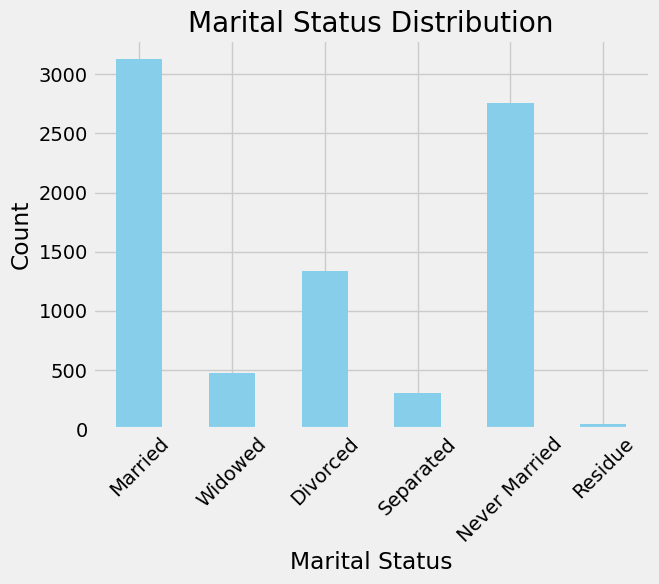

In [246]:
# Marital Status Distribution 
# Update x-axis labels
custom_order = [1, 2, 3, 4, 5, 8]  
marital_labels = ['Married', 'Widowed','Divorced', 'Separated', 'Never Married', 'Residue'] 

# Ensure data is reordered based on `custom_order`
marital_counts = proj_df['MARITAL'].value_counts()

# Reorder based on custom_order
marital_counts = marital_counts.reindex(custom_order)

# Plot the reordered data
marital_counts.plot(kind='bar', color='skyblue')

# Update x-axis labels
plt.xticks(ticks=range(len(marital_labels)), labels=marital_labels, rotation = 45)

# Add title and labels
plt.title("Marital Status Distribution")
plt.xlabel("Marital Status")
plt.ylabel("Count")
plt.show()

In [247]:
marital_proportions = marital_counts/len(proj_df)
marital_table = pd.DataFrame({
    'Marital Status': marital_labels,
    'Count': marital_counts.values,
    'Proportion': marital_proportions.values
})
print(marital_table)

  Marital Status  Count  Proportion
0        Married   3131    0.389283
1        Widowed    475    0.059058
2       Divorced   1333    0.165734
3      Separated    301    0.037424
4  Never Married   2760    0.343156
5        Residue     43    0.005346


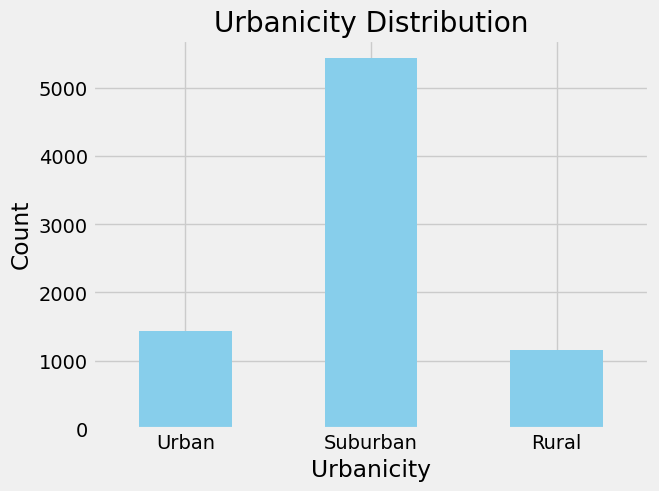

In [248]:
# Urbanicity Bar Plot
urban_order = [1, 2, 3]
urban_labels = ['Urban', 'Suburban', 'Rural']
urbanicity_counts = proj_df['URBANICITY'].value_counts().reindex(urban_order)
urbanicity_counts.plot(kind='bar', color='skyblue')
plt.xticks(ticks=range(len(urban_labels)), labels = urban_labels, rotation = 0)
plt.title("Urbanicity Distribution")
plt.xlabel("Urbanicity")
plt.ylabel("Count")
plt.show()

In [249]:
urban_proportions = urbanicity_counts/len(proj_df)
urban_table = pd.DataFrame({
    'Urbanicity': urban_labels,
    'Count': urbanicity_counts.values,
    'Proportion': urban_proportions.values
})
print(urban_table)

  Urbanicity  Count  Proportion
0      Urban   1441    0.179162
1   Suburban   5442    0.676613
2      Rural   1160    0.144225


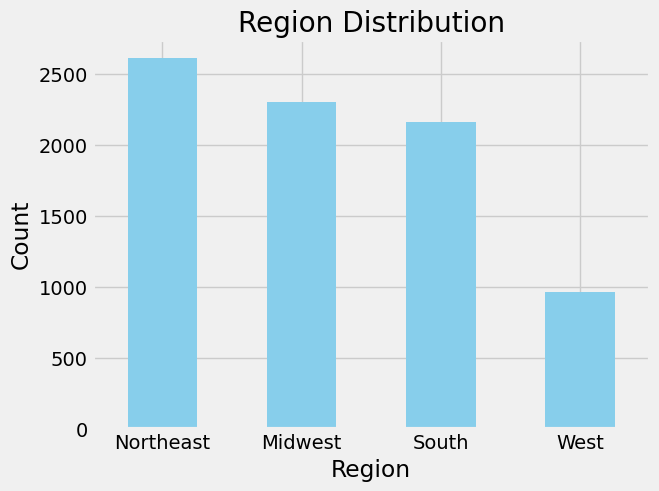

In [250]:
# Region Distribution 
region_counts = proj_df['REGION'].value_counts()
region_counts.plot(kind='bar', color='skyblue')
plt.xticks(ticks=range(4), labels = ['Northeast', 'Midwest', 'South', 'West'], rotation = 0)
plt.title("Region Distribution")
plt.xlabel("Region")
plt.ylabel("Count")
plt.show()


In [251]:
region_proportions = region_counts/len(proj_df)
region_table = pd.DataFrame({
    'Region': ['Northeast', 'Midwest', 'South', 'West'],
    'Count': region_counts.values,
    'Proportion': region_proportions.values
})
print(region_table)

      Region  Count  Proportion
0  Northeast   2612    0.324754
1    Midwest   2304    0.286460
2      South   2162    0.268805
3       West    965    0.119980


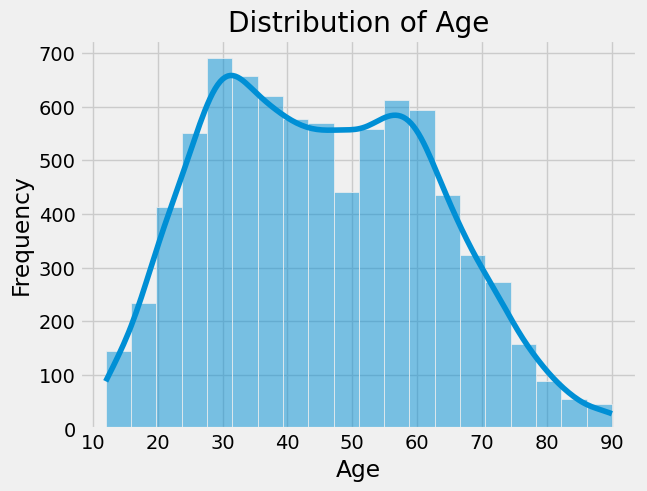

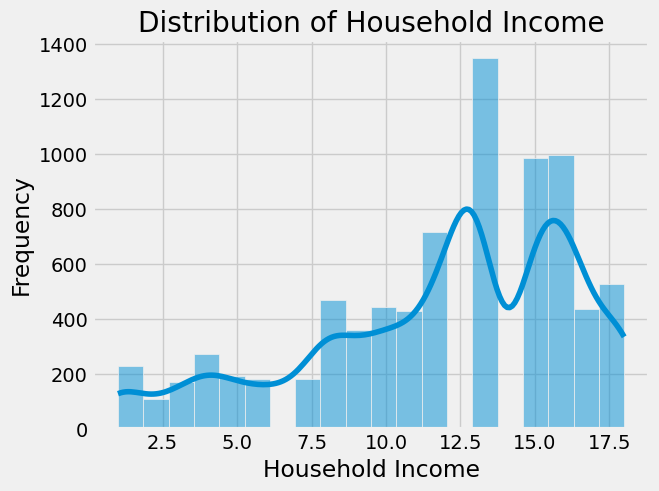

In [252]:
filtered_df = proj_df[~proj_df['AGE'].isin([98, 99])]
filtered_df = proj_df[~proj_df['INCOME'].isin([98, 99])]
# Age Distribution
sns.histplot(filtered_df['AGE'], kde=True, bins=20)
plt.title("Distribution of Age")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

# Household Income Distribution
sns.histplot(filtered_df['INCOME'], kde=True, bins=20)
plt.title("Distribution of Household Income")
plt.xlabel("Household Income")
plt.ylabel("Frequency")
plt.show()


In [253]:
age_mean = filtered_df['AGE'].mean()
age_median = filtered_df['AGE'].median()
income_mean = filtered_df['INCOME'].mean()
income_median = filtered_df['INCOME'].median()
income_iqr = np.percentile(filtered_df['INCOME'], 75) - np.percentile(filtered_df['INCOME'], 25)
print(age_mean, age_median, income_mean, income_median, income_iqr)

45.24841477060798 44.0 11.844088026855651 13.0 6.0


#### C. Statistical Analysis:

#### Explore relationships between categorical variables.

In [254]:
filtered_df = proj_df[~proj_df['MARITAL'].isin([8, 9])]

filtered_df = filtered_df[filtered_df['BROKEN_IN'] != 8]

In [255]:
# business sign vs. if broken in
crosstab = pd.crosstab(filtered_df['BUSINESS_SIGN'], filtered_df['BROKEN_IN'])
print(crosstab)
# Chi-square test
chi2, p, dof, expected = chi2_contingency(crosstab)
print(f"Chi-square statistic: {chi2}, p-value: {p}")

BROKEN_IN        1     2
BUSINESS_SIGN           
1                0    25
2               32   456
9              839  6647
Chi-square statistic: 13.274394826562501, p-value: 0.0013106954388473326


BROKEN_IN    1     2
MARITAL             
1          259  2872
2           69   406
3          217  1115
4           46   255
5          280  2480
Chi-square statistic: 76.1993015707451, p-value: 1.1109762631960507e-15


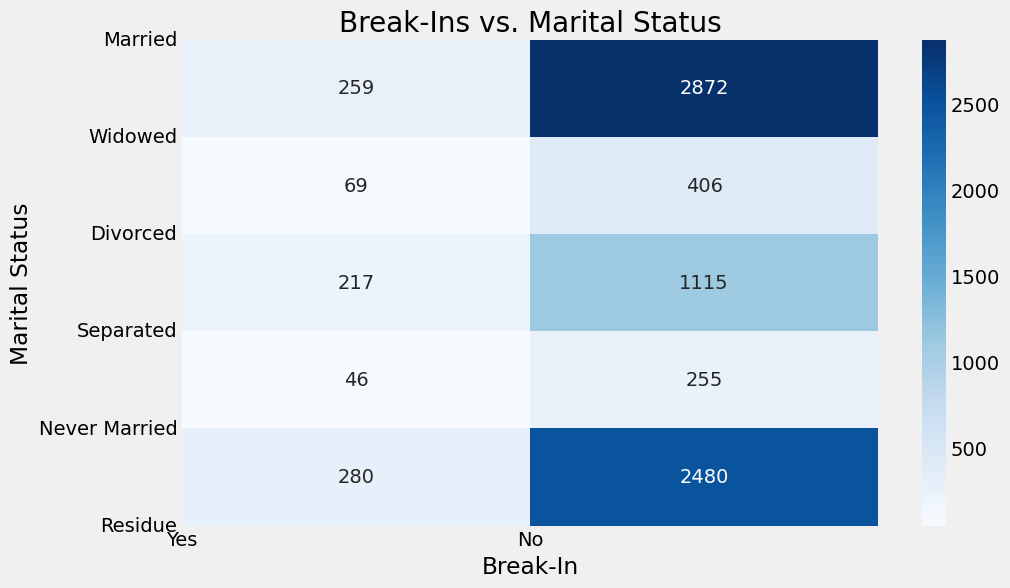

In [256]:
# marital status vs. if broken in 
crosstab = pd.crosstab(filtered_df['MARITAL'], filtered_df['BROKEN_IN'])
print(crosstab)
# Chi-square test
chi2, p, dof, expected = chi2_contingency(crosstab)
print(f"Chi-square statistic: {chi2}, p-value: {p}")

plt.figure(figsize=(10, 6))
sns.heatmap(crosstab, annot=True, cmap='Blues', fmt='g')  
plt.title("Break-Ins vs. Marital Status")
plt.xticks(ticks=range(2), labels = ['Yes', 'No'], rotation = 0)
plt.yticks(ticks=range(6), labels = marital_labels, rotation = 0)
plt.xlabel("Break-In")
plt.ylabel("Marital Status")
plt.show()

In [257]:
# sex vs. forced sex
crosstab = pd.crosstab(proj_df['SEX'], proj_df['FORCED_SEX'])
print(crosstab)
# Chi-square test
chi2, p, dof, expected = chi2_contingency(crosstab)
print(f"Chi-square statistic: {chi2}, p-value: {p}")

FORCED_SEX   1     2  3
SEX                    
1           10  3694  1
2           89  4248  1
Chi-square statistic: 52.18999143231977, p-value: 4.646087184961424e-12


SEX        1     2
POLICE            
1        240   368
2       3465  3970
Chi-square statistic: 11.215662718437706, p-value: 0.0008110983930029818


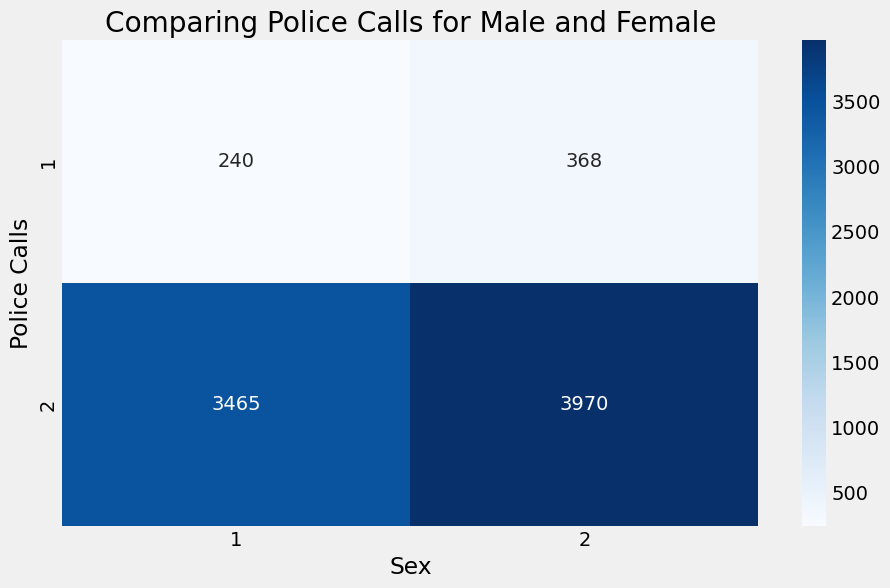

In [258]:
# sex vs. reporting to police
crosstab = pd.crosstab(proj_df['POLICE'], proj_df['SEX'])
print(crosstab)
# Chi-square test
chi2, p, dof, expected = chi2_contingency(crosstab)
print(f"Chi-square statistic: {chi2}, p-value: {p}")

plt.figure(figsize=(10, 6))
sns.heatmap(crosstab, annot=True, cmap='Blues', fmt='g')  
plt.title("Comparing Police Calls for Male and Female")
plt.xlabel("Sex")
plt.ylabel("Police Calls")
plt.show()

In [259]:
# sex vs. known offender
crosstab = pd.crosstab(proj_df['SEX'], proj_df['OFFENDER_KNOWN'])
print(crosstab)
# Chi-square test
chi2, p, dof, expected = chi2_contingency(crosstab)
print(f"Chi-square statistic: {chi2}, p-value: {p}")

OFFENDER_KNOWN    1     2
SEX                      
1               135  3570
2               284  4054
Chi-square statistic: 33.519343787683084, p-value: 7.055875348576616e-09


In [260]:
# citizenship vs. police
crosstab = pd.crosstab(proj_df['CITIZENSHIP'], proj_df['POLICE'])
print(crosstab)
# Chi-square test
chi2, p, dof, expected = chi2_contingency(crosstab)
print(f"Chi-square statistic: {chi2}, p-value: {p}")

POLICE         1     2
CITIZENSHIP           
1            547  6619
2              3    26
3              2    33
4             29   392
5             23   331
8              4    34
Chi-square statistic: 1.8700168974866636, p-value: 0.8668224581000264


In [261]:
# sexual orientation vs. calling police
crosstab = pd.crosstab(proj_df['SEXUAL_ORIENTATION'], proj_df['POLICE'])
print(crosstab)
# Chi-square test
chi2, p, dof, expected = chi2_contingency(crosstab)
print(f"Chi-square statistic: {chi2}, p-value: {p}")

POLICE                1     2
SEXUAL_ORIENTATION           
1                    10   209
2                   545  6554
3                    25   167
4                     2    57
5                     1    36
6                    16   198
8                     1    18
9                     8   196
Chi-square statistic: 17.86955964205884, p-value: 0.012572590522104191


In [262]:
# citizenship vs. if broken in
crosstab = pd.crosstab(proj_df['CITIZENSHIP'], proj_df['BROKEN_IN'])
print(crosstab)
# Chi-square test
chi2, p, dof, expected = chi2_contingency(crosstab)
print(f"Chi-square statistic: {chi2}, p-value: {p}")

BROKEN_IN      1     2  8
CITIZENSHIP              
1            796  6369  1
2              0    29  0
3              4    31  0
4             47   374  0
5             25   329  0
8              7    31  0
Chi-square statistic: 11.582511743780334, p-value: 0.3139683152663629


In [263]:
# gated vs. if broken in
crosstab = pd.crosstab(filtered_df['GATED'], filtered_df['BROKEN_IN'])
print(crosstab)
# Chi-square test
chi2, p, dof, expected = chi2_contingency(crosstab)
print(f"Chi-square statistic: {chi2}, p-value: {p}")

BROKEN_IN    1     2
GATED               
1           52   698
2          819  6430
Chi-square statistic: 12.89879892639247, p-value: 0.00032879305701299575


#### categorical vs. numerical

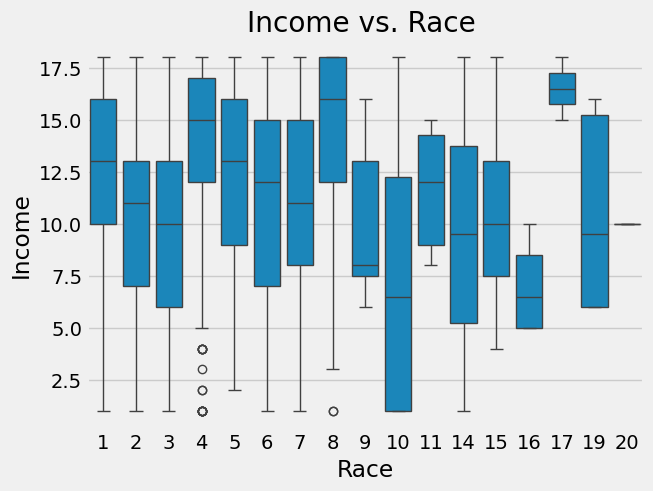

T-statistic: 14.621696157933911, p-value: 9.573632579171559e-48


In [264]:
# race vs. income 
sns.boxplot(x='RACE', y='INCOME', data=proj_df)
plt.title("Income vs. Race ")
plt.xlabel("Race")
plt.ylabel("Income")
plt.show()

# T-test for a specific comparison
group1 = proj_df[proj_df['RACE'] == 1]['INCOME'] # white
group2 = proj_df[proj_df['RACE'] == 2]['INCOME'] # black households
t_stat, p_val = ttest_ind(group1, group2, nan_policy='omit')
print(f"T-statistic: {t_stat}, p-value: {p_val}")


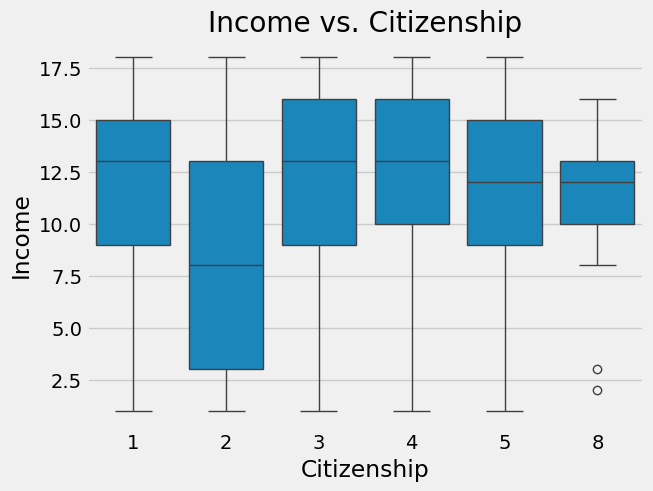

T-statistic: 0.8056290358199334, p-value: 0.42048225812131357


In [265]:
# citizenship vs. income
sns.boxplot(x='CITIZENSHIP', y='INCOME', data=proj_df)
plt.title("Income vs. Citizenship")
plt.xlabel("Citizenship")
plt.ylabel("Income")
plt.show()

# T-test for a specific comparison
group1 = proj_df[proj_df['CITIZENSHIP'] == 1]['INCOME'] # born and raised in the US
group2 = proj_df[proj_df['CITIZENSHIP'] == 5]['INCOME'] # not a citizen
t_stat, p_val = ttest_ind(group1, group2, nan_policy='omit')
print(f"T-statistic: {t_stat}, p-value: {p_val}")

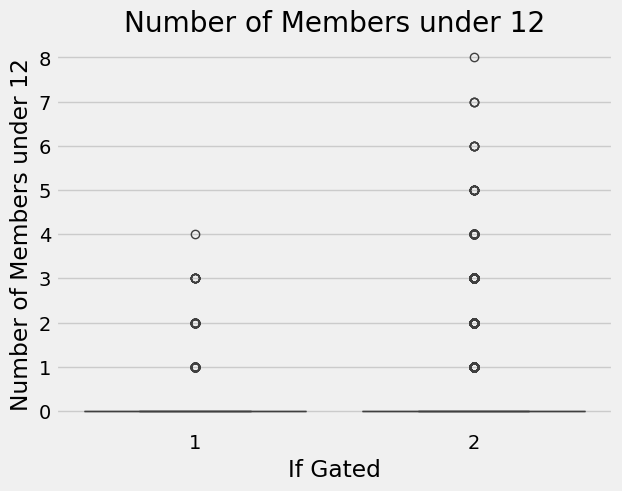

T-statistic: -5.7517911165397635, p-value: 9.153632526698762e-09


In [266]:
# if gated vs. number of children under 12
sns.boxplot(x='GATED', y='NUM_UNDER12', data=proj_df)
plt.title("Number of Members under 12")
plt.xlabel("If Gated")
plt.ylabel("Number of Members under 12")
plt.show()

# T-test for a specific comparison
group1 = proj_df[proj_df['GATED'] == 1]['NUM_UNDER12']
group2 = proj_df[proj_df['GATED'] == 2]['NUM_UNDER12']
t_stat, p_val = ttest_ind(group1, group2, nan_policy='omit')
print(f"T-statistic: {t_stat}, p-value: {p_val}")

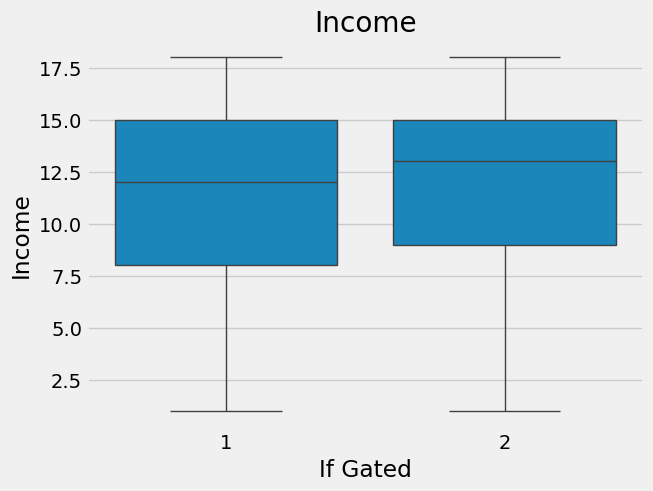

T-statistic: -3.3612748632309066, p-value: 0.0007794512433188405


In [267]:
# gated vs. income
sns.boxplot(x='GATED', y='INCOME', data=proj_df)
plt.title("Income")
plt.xlabel("If Gated")
plt.ylabel("Income")
plt.show()

# T-test for a specific comparison
group1 = proj_df[proj_df['GATED'] == 1]['INCOME']
group2 = proj_df[proj_df['GATED'] == 2]['INCOME']
t_stat, p_val = ttest_ind(group1, group2, nan_policy='omit')
print(f"T-statistic: {t_stat}, p-value: {p_val}")

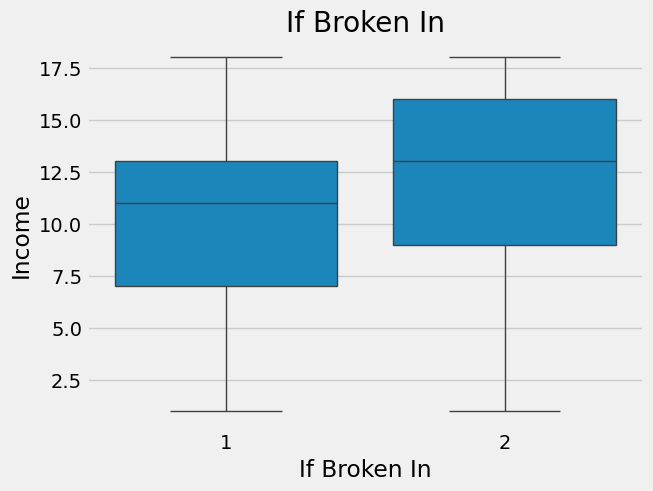

T-statistic: -10.202390368968258, p-value: 2.7190249231168336e-24


In [268]:
# income vs. broken in
sns.boxplot(x='BROKEN_IN', y='INCOME', data=filtered_df)
plt.title("If Broken In")
plt.xlabel("If Broken In")
plt.ylabel("Income")
plt.show()

# T-test for a specific comparison
group1 = proj_df[proj_df['BROKEN_IN'] == 1]['INCOME'] # yes
group2 = proj_df[proj_df['BROKEN_IN'] == 2]['INCOME'] # no
t_stat, p_val = ttest_ind(group1, group2, nan_policy='omit')
print(f"T-statistic: {t_stat}, p-value: {p_val}")

([<matplotlib.axis.XTick at 0x316d7cbf0>,
 [Text(0, 0, 'Elementary (1-8)'),
  Text(1, 0, 'High School (9-12)'),
  Text(2, 0, 'College (21-26)'),
  Text(3, 0, '12 Grade (no diploma)'),
  Text(4, 0, 'HS Graduate'),
  Text(5, 0, 'Some College (no degree)'),
  Text(6, 0, 'Associate'),
  Text(7, 0, 'Bachelor'),
  Text(8, 0, 'Master'),
  Text(9, 0, 'Prof School'),
  Text(10, 0, 'Doctorate')])

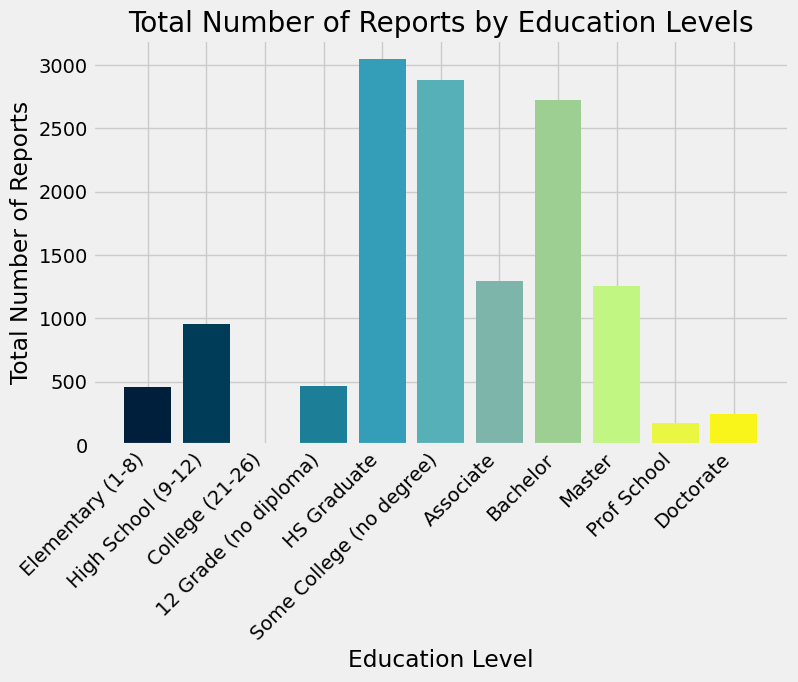

In [269]:
# ED vs. break ins
filtered_df = filtered_df[~filtered_df['ED'].isin([98, 99])]
elementary_num_report =  filtered_df.loc[(filtered_df['ED'] >= 1) & (filtered_df['ED'] <= 8), 'NUM_REPORT'].sum()
hs_num_report =  filtered_df.loc[(filtered_df['ED'] >= 9) & (filtered_df['ED'] <= 12), 'NUM_REPORT'].sum()
college_num_report =  filtered_df.loc[(filtered_df['ED'] >= 21) & (filtered_df['ED'] <= 26), 'NUM_REPORT'].sum()
no_diploma = filtered_df.loc[(filtered_df['ED'] == 27),'NUM_REPORT'].sum()
hs_grad = filtered_df.loc[(filtered_df['ED'] == 28),'NUM_REPORT'].sum()
college_no_degree = filtered_df.loc[(filtered_df['ED'] == 40),'NUM_REPORT'].sum()
associate = filtered_df.loc[(filtered_df['ED'] == 41),'NUM_REPORT'].sum()
bachelor = filtered_df.loc[(filtered_df['ED'] == 42),'NUM_REPORT'].sum()
master = filtered_df.loc[(filtered_df['ED'] == 43),'NUM_REPORT'].sum()
prof = filtered_df.loc[(filtered_df['ED'] == 44),'NUM_REPORT'].sum()
doctorate = filtered_df.loc[(filtered_df['ED'] == 45),'NUM_REPORT'].sum()


education_levels = ['Elementary (1-8)', 'High School (9-12)', 'College (21-26)', '12 Grade (no diploma)', 'HS Graduate',
                    'Some College (no degree)', 'Associate', 'Bachelor','Master', 'Prof School', 'Doctorate']
num_reports = [elementary_num_report, hs_num_report, college_num_report, 
               no_diploma, hs_grad, college_no_degree, associate, bachelor, master, prof, doctorate]

cividis_colors = [
    '#001f3d',  # Dark Blue
    '#003c57',  # Deep Blue
    '#006279',  # Medium Blue
    '#1c7f97',  # Soft Blue
    '#349db8',  # Light Blue
    '#56b0b7',  # Light Teal
    '#7db5ab',  # Soft Green
    '#9ecf92',  # Pale Green
    '#c1f682',  # Light Yellow-Green
    '#e9f742',  # Bright Yellow
    '#f9f419'   # Very Bright Yellow
]

# Create the bar plot
plt.figure(figsize=(8, 5))
plt.bar(education_levels, num_reports, color=cividis_colors)

# Add titles and labels
plt.title('Total Number of Reports by Education Levels')
plt.xlabel('Education Level')
plt.ylabel('Total Number of Reports')
plt.xticks(ticks=range(len(education_levels)), labels=education_levels, rotation=45, ha='right')

In [270]:
# T-test for a specific comparison
group1 = filtered_df[(filtered_df['ED'] >= 9) & (filtered_df['ED'] <= 12)]['NUM_REPORT'] # high school
group2 = filtered_df[filtered_df['ED'] == 42]['NUM_REPORT'] # bachelor degree
t_stat, p_val = ttest_ind(group1, group2, nan_policy='omit')
print(f"T-statistic: {t_stat}, p-value: {p_val}")


T-statistic: 7.649280130617344, p-value: 3.0068337164954597e-14


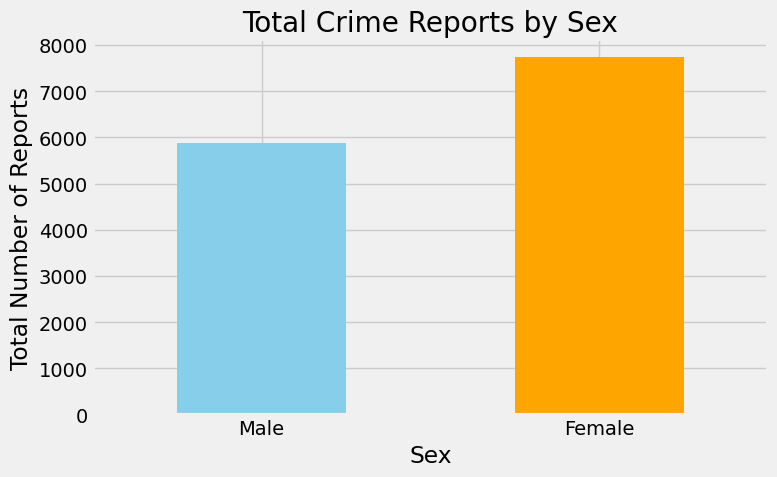

In [271]:
sex_report_counts = proj_df.groupby('SEX')['NUM_REPORT'].sum()

# Create a bar plot
plt.figure(figsize=(8, 5))
sex_report_counts.plot(kind='bar', color=['skyblue', 'orange'])

# Add titles and labels
plt.title('Total Crime Reports by Sex')
plt.xlabel('Sex')
plt.ylabel('Total Number of Reports')
plt.xticks(ticks=range(2), labels = ['Male', 'Female'], rotation = 0)


# Show the plot
plt.tight_layout()
plt.show()



In [272]:
# T-test for a specific comparison
group1 = filtered_df[filtered_df['SEX'] == 1]['NUM_REPORT'] # male
group2 = filtered_df[filtered_df['SEX'] == 2]['NUM_REPORT'] # female
t_stat, p_val = ttest_ind(group1, group2, nan_policy='omit')
print(f"T-statistic: {t_stat}, p-value: {p_val}")

T-statistic: -6.642392512943516, p-value: 3.28902423583833e-11


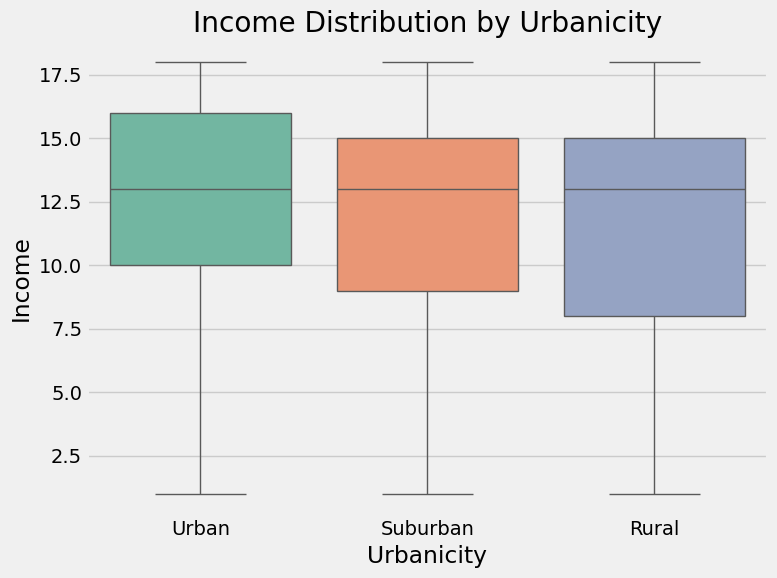

In [273]:
# urbanicity and HH income
plt.figure(figsize=(8, 6))
sns.boxplot(x='URBANICITY', y='INCOME', data=filtered_df, palette='Set2')

# Add titles and labels
plt.title('Income Distribution by Urbanicity')
plt.xlabel('Urbanicity')
plt.ylabel('Income')
plt.xticks(ticks=range(3), labels = ['Urban', 'Suburban', 'Rural'], rotation = 0)


# Show the plot
plt.tight_layout()
plt.show()

In [274]:
# T-test for a specific comparison
group1 = filtered_df[(filtered_df['URBANICITY'] == 1)]['INCOME'] # URBAN
group2 = filtered_df[(filtered_df['URBANICITY'] == 3)]['INCOME'] # RURAL
t_stat, p_val = ttest_ind(group1, group2, nan_policy='omit')
print(f"T-statistic: {t_stat}, p-value: {p_val}")

T-statistic: 5.183626567349994, p-value: 2.3448386221227098e-07


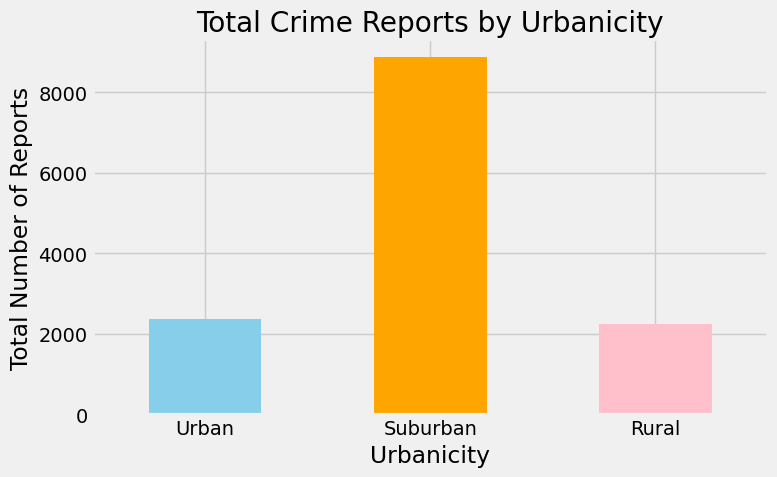

In [275]:
# urbanicity and crime reports
filtered_df = filtered_df[~filtered_df['URBANICITY'].isin([8, 9, -1])]
urbanicity_report_counts = filtered_df.groupby('URBANICITY')['NUM_REPORT'].sum()

# Create a bar plot
plt.figure(figsize=(8, 5))
urbanicity_report_counts.plot(kind='bar', color=['skyblue', 'orange','pink'])

# Add titles and labels
plt.title('Total Crime Reports by Urbanicity')
plt.xlabel('Urbanicity')
plt.ylabel('Total Number of Reports')
plt.xticks(ticks=range(3), labels = ['Urban', 'Suburban', 'Rural'], rotation = 0)


# Show the plot
plt.tight_layout()
plt.show()

In [276]:
# T-test for a specific comparison
group1 = filtered_df[(filtered_df['URBANICITY'] == 1)]['NUM_REPORT'] # URBAN
group2 = filtered_df[(filtered_df['URBANICITY'] == 3)]['NUM_REPORT'] # RURAL
t_stat, p_val = ttest_ind(group1, group2, nan_policy='omit')
print(f"T-statistic: {t_stat}, p-value: {p_val}")


T-statistic: -4.3291570610198535, p-value: 1.5539559139727118e-05


IndexError: index 0 is out of bounds for axis 0 with size 0

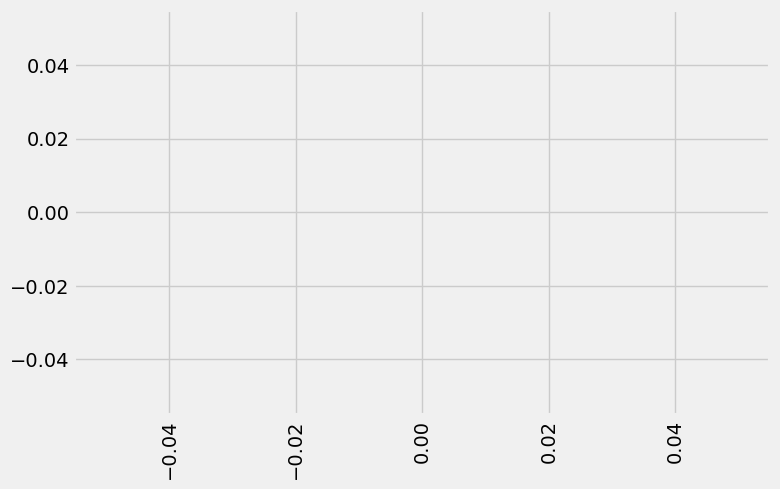

In [277]:
# REGION and crime reports
filtered_df = filtered_df[~filtered_df['REGION'] == -1]
region_report_counts = filtered_df.groupby('REGION')['NUM_REPORT'].sum()

# Create a bar plot
plt.figure(figsize=(8, 5))
region_report_counts.plot(kind='bar', color=['skyblue', 'orange','pink', 'grey'])

# Add titles and labels
plt.title('Total Crime Reports by Region')
plt.xlabel('Region')
plt.ylabel('Total Number of Reports')
plt.xticks(ticks=range(4), labels = ['Northeast', 'Midwest', 'South', 'West'], rotation = 0)


# Show the plot
plt.tight_layout()
plt.show()

In [173]:
region_report_counts
urbanicity_report_counts

URBANICITY
1    2381
2    8864
3    2246
Name: NUM_REPORT, dtype: int64

#### numerical vs. numerical

Text(0, 0.5, 'Number of Crime Reports')

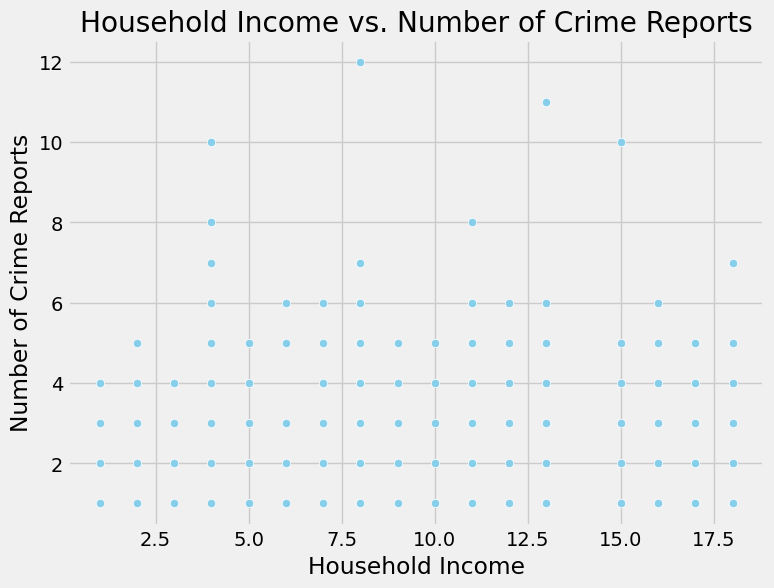

In [152]:
# income vs. num_report
plt.figure(figsize=(8, 6))
sns.scatterplot(x='INCOME', y='NUM_REPORT', data=filtered_df, color='skyblue')

# Add titles and labels
plt.title('Household Income vs. Number of Crime Reports')
plt.xlabel('Household Income')
plt.ylabel('Number of Crime Reports')

In [155]:
filtered_df[['INCOME', 'NUM_REPORT']].corr(method='pearson')

,INCOME,NUM_REPORT
INCOME,1.000000,-0.101863
NUM_REPORT,-0.101863,1.000000


In [157]:
from scipy.stats import pearsonr
corr_coefficient, p_value = pearsonr(proj_df['INCOME'].dropna(), proj_df['NUM_REPORT'].dropna())
print(p_value)


6.192244843442895e-20


#### D. Visualization

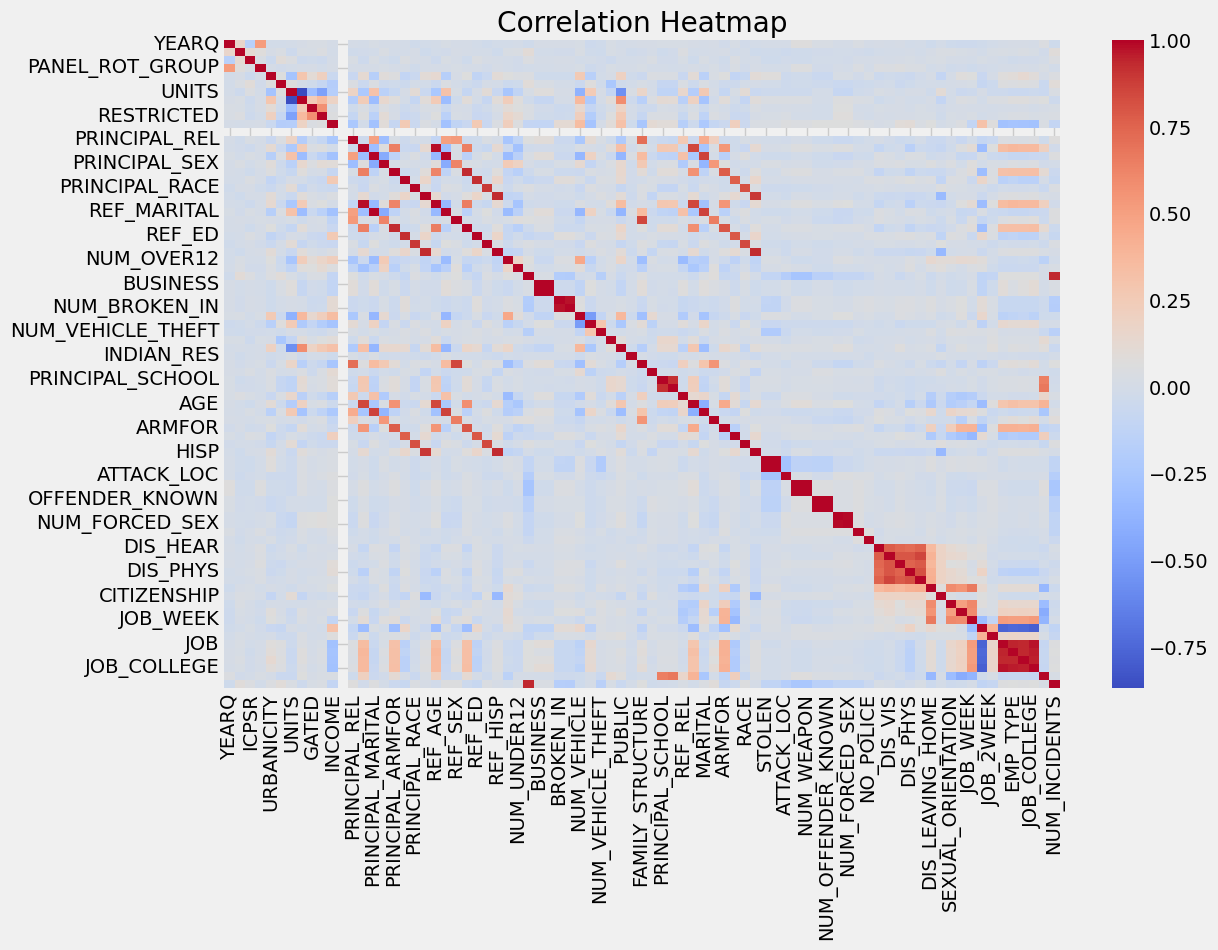

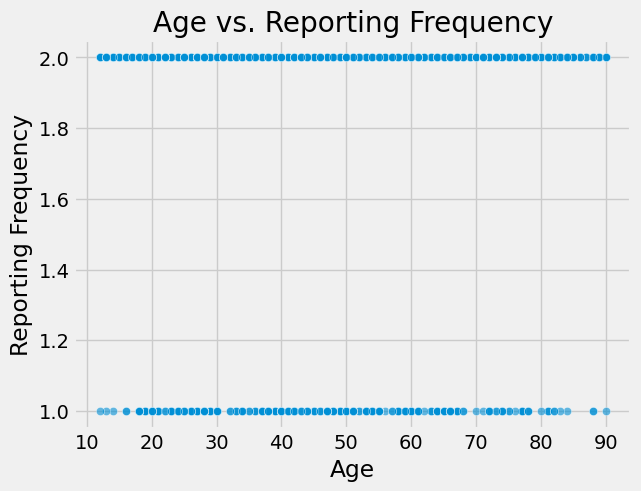

In [77]:
# Heatmap of Correlations
plt.figure(figsize=(12, 8))
sns.heatmap(proj_df.corr(), cmap='coolwarm', annot=False)
plt.title("Correlation Heatmap")
plt.show()
